In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from scipy.stats import norm
import pandas as pd
from mlxtend.plotting import plot_decision_regions

# Neural Networks: List3 - Problem 3

In [2]:
cov_matrix_A = np.random.random(size=(2,2))
cov_matrix_A[0, 0] *= 3
cov_matrix_A[1, 1] *= 3
cov_matrix_A[0, 1] = cov_matrix_A[0, 0] * cov_matrix_A[1, 1] * cov_matrix_A[0, 1]
cov_matrix_A[1, 0] = cov_matrix_A[0, 1]
cov_matrix_A

array([[ 0.45341962,  0.67685927],
       [ 0.67685927,  2.24145305]])

In [3]:
cov_matrix_B = np.random.random(size=(2,2))
cov_matrix_B[0, 0] *= 3
cov_matrix_B[1, 1] *= 3
cov_matrix_B[0, 1] = cov_matrix_B[0, 0] * cov_matrix_B[1, 1] * cov_matrix_B[0, 1]
cov_matrix_B[1, 0] = cov_matrix_B[0, 1]
cov_matrix_B

array([[ 1.72698212,  1.00557275],
       [ 1.00557275,  1.49197207]])

In [4]:
expecatation_value1 = np.array([1,1])
expecatation_value2 = np.array([3,3])

In [5]:
samples_number = 100
set1 = np.random.multivariate_normal(size=samples_number, mean=expecatation_value1, cov=cov_matrix_A)
set2 = np.random.multivariate_normal(size=samples_number, mean=expecatation_value2, cov=cov_matrix_B)

In [6]:
def scalar_MSE(X, Y):
  loss = 0
  for i in range(X.shape[0]):
    loss += 0.5 * np.abs(X[i] - Y[i])**2
  return loss

In [7]:
def sigmoid(x):
  return np.power(1+np.exp(-x),-1)

In [8]:
def scalar_MSE_derivative(x, y, estimator):
  disc = estimator(x)
  loss = (disc - y) * disc * (1 - disc)
  return loss

In [9]:
class sigmoid_discriminant:
  def __init__(self, weights, bias):
    self.__weights = weights
    self.__bias = bias
    
  def predict(self, x):
    pred = lambda t: sigmoid(self.__weights @ t + self.__bias)
    if len(x.shape)==2:
      return np.apply_along_axis(func1d=pred, arr=x, axis=1)
    else:
      return pred(x)
  
  @property
  def weights(self):
    return np.copy(self.__weights)
  
  @weights.setter
  def weights(self, weights):
    self.__weights = weights
  
  @property
  def bias(self):
    return np.copy(self.__bias)
  
  @bias.setter
  def bias(self, bias):
    self.__bias = bias

In [10]:
def train_sigmoid_discriminant(train_set, labels, epochs, learning_rate):
  weights = np.random.random((2,))*2 -1
  bias = np.random.random()*2-1
  disc = sigmoid_discriminant(weights, bias)
  for i in range(epochs):
    weights_change = np.zeros((2,))
    bias_change = np.zeros((1,))
    for j in range(train_set.shape[0]):
      loss_der = scalar_MSE_derivative(train_set[j], labels[j], disc.predict)
      weights_change = loss_der * train_set[j]
      bias_change = loss_der
      disc.weights -= learning_rate * weights_change
      disc.bias -= 10 * learning_rate * bias_change
    if i % 10 == 0 or i <10: 
      plot_dists_with_elipses(train_set, labels.astype('int'), learned=disc)
      print(scalar_MSE(np.apply_along_axis(func1d=disc.predict,arr=trainset,axis=1).flatten(), labels))
  return disc

In [11]:
trainset = np.concatenate((set1, set2))
targets = np.concatenate((np.zeros((samples_number,)), np.ones((samples_number,))))

In [12]:
def plot_dists_with_elipses(X, Y, learned, n=1):
  def eigsorted(cov):
    vals, vecs = np.linalg.eigh(cov)
    order = vals.argsort()[::-1]
    return vals[order], vecs[:,order]
  A = X[:int(X.shape[0]/2)]
  B = X[int(X.shape[0]/2):]
  df_A = pd.DataFrame(A, columns=['x1', 'x2'])
  df_B = pd.DataFrame(B, columns=['x1', 'x2'])
  
#   eig_values_A, eig_vectors_A = eigsorted(df_A.cov())
#   eig_values_B, eig_vectors_B = eigsorted(df_B.cov())
  
#   width_A, height_A = 2 * n * np.sqrt(eig_values_A)
#   width_B, height_B = 2 * n * np.sqrt(eig_values_B)
  
#   theta_A = np.degrees(np.arctan2(*eig_vectors_A[:,0][::-1]))
#   theta_B = np.degrees(np.arctan2(*eig_vectors_B[:,0][::-1]))
  
#   e1 = patches.Ellipse(df_A.mean(), width_A, height_A, linewidth=2, fill=False, angle=theta_A, color='xkcd:goldenrod')
#   e2 = patches.Ellipse(df_B.mean(), width_B, height_B, linewidth=2, fill=False, angle=theta_B, color='xkcd:sky blue')
  
  plot_decision_regions(X, Y, clf=learned)
  
  plt.xlabel(r'$x_1$')
  plt.ylabel(r'$x_2$')
  plt.title(r'Decision regions for sigmoid discriminant')
  plt.legend()
  
#   ax = plt.gca()
#   ax.add_artist(e1)
#   ax.add_artist(e2)
  plt.show()

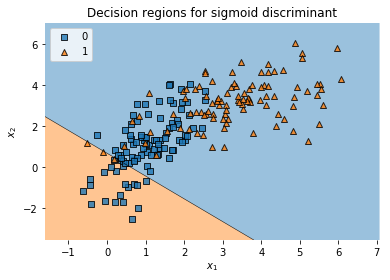

53.0631469462


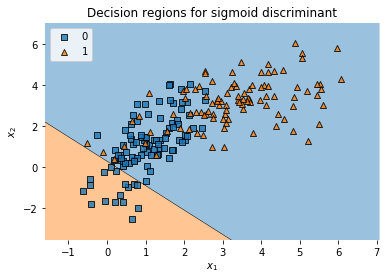

51.8447888573


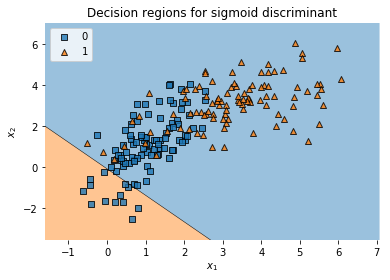

50.7810228067


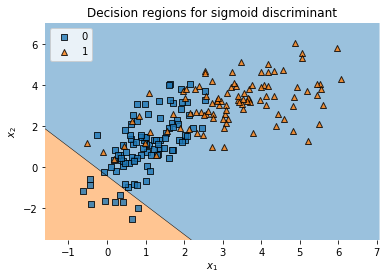

49.7463143416


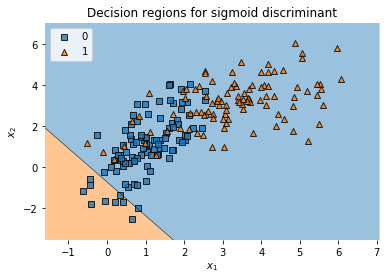

48.4445730891


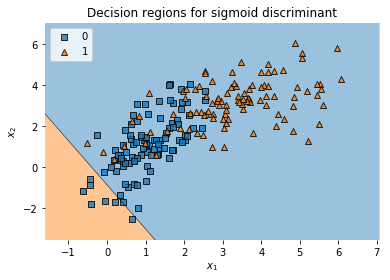

45.6942008252


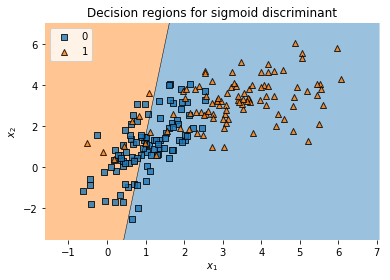

31.999428341


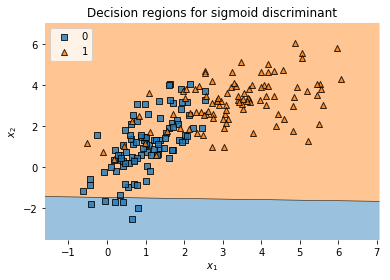

24.7247791412


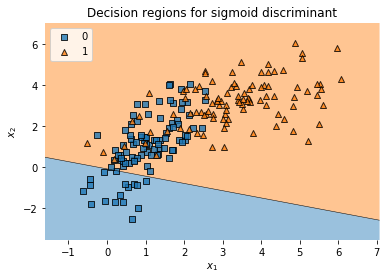

22.1569481061


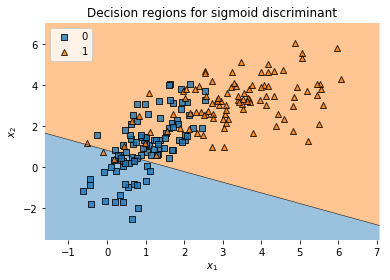

19.679444492


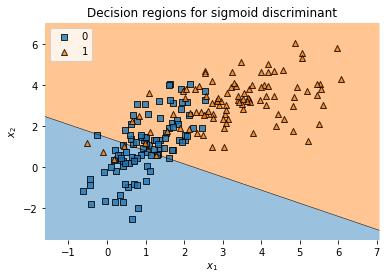

17.8986895589


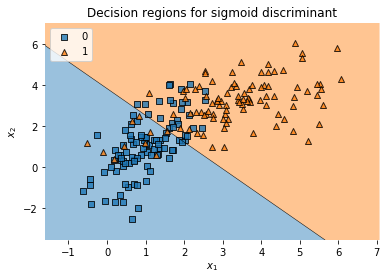

12.5716370644


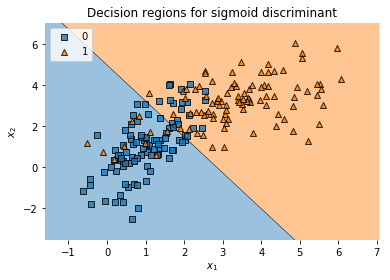

11.4107360847


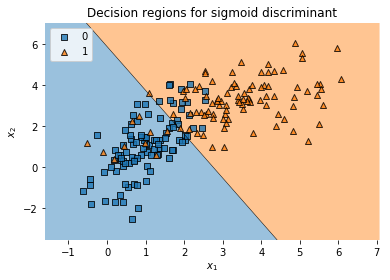

10.8778951357


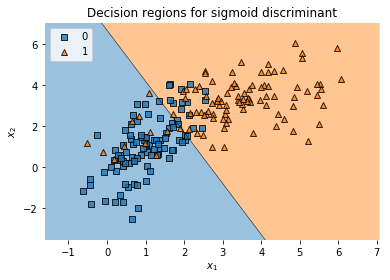

10.5631616625


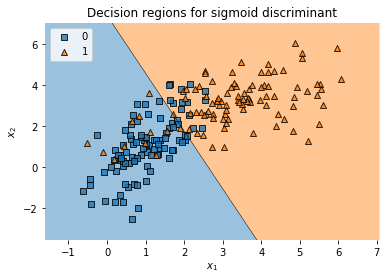

10.3523813328


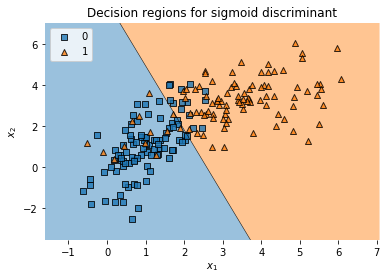

10.2002005514


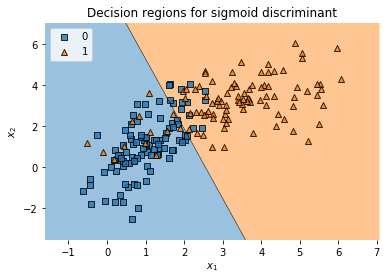

10.0846492377


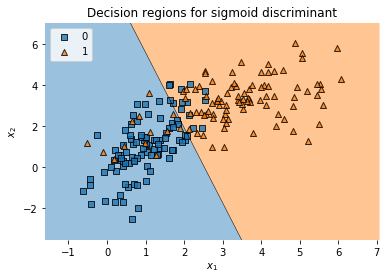

9.99365566897


In [13]:
disc = train_sigmoid_discriminant(trainset, targets, 100, 0.01)

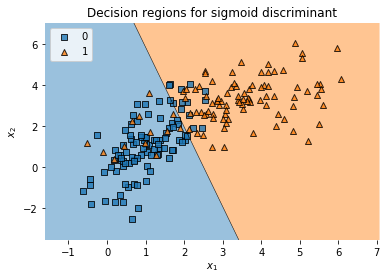

In [14]:
plot_dists_with_elipses(trainset, targets.astype('int'), disc)